## PCA tentative on images

In [59]:
%matplotlib inline
from sklearn.decomposition import PCA
from pylab import *
from skimage import data, io, color
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

In [60]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

# Will produce the list of patches (of size w x h obtained from the image)
def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

In [61]:
# Loaded a set of images
root_dir = "/Users/hugomoreau/Dropbox/Etudes/Master/Pattern classification and machine learning/Projects/Data-project-2/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(20, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 10 # Only use 10 images for training

Loading 20 images
satImage_001.png
Loading 20 images
satImage_001.png


In [62]:
def img_uint8_to_float(img):
    return img/255

def img3Dto2D(img):
    img = img_float_to_uint8(img)
    converted = img[:,:,0] + (2**8)*img[:,:,1] + (2**16)*img[:,:,2]
    return converted

def img2Dto3D(img):
    img = img.astype(uint8)
    R = img % 256
    G = (img >> 8) % 256
    B = (img >> 16) % 256
    toReturn = np.concatenate((R[:,:,np.newaxis],G[:,:,np.newaxis],B[:,:,np.newaxis]),axis=2)
    return img_uint8_to_float(toReturn)

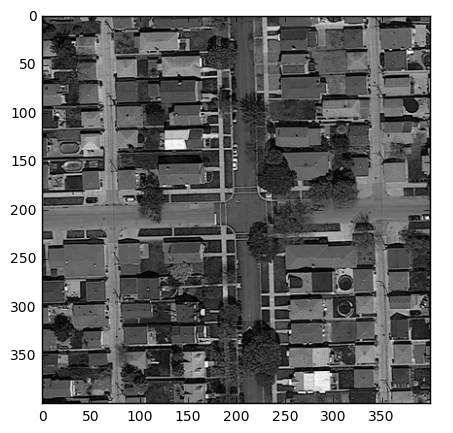

In [63]:
from skimage.color import rgb2gray

sample = imgs[0]
fig1 = plt.figure(figsize=(5, 5))
plt.imshow(sample[:,:,2],cmap='Greys_r')

#sample2D = img3Dto2D(sample)

In [64]:
for i in range(1, 4):
    n_comp = 5 ** i
    pca = PCA(n_components = n_comp)
    pca.fit(sample)
    sample_pca = pca.fit_transform(sample)
    sample_restored = pca.inverse_transform(sample_pca)
    fig1 = plt.figure(figsize=(5, 5))
    plt.title('n_components = {}'.format(n_comp))
    plt.imshow(sample_restored,cmap='Greys_r')
    print('Restored image n_components = {}'.format(n_comp))
    print('Variance retained {}'.format(((1 - sum(pca.explained_variance_ratio_) / size(pca.explained_variance_ratio_)) * 100)))
    print('Compression Ratio {}'.format((float(size(sample_pca)) / size(sample) * 100)))
    show()
    

ValueError: Found array with dim 3. Estimator expected <= 2.